In [3]:
import networkx as nx
import pylab as plt
import pandas as pd
# Create blank graph
D=nx.DiGraph()

citations_with_data= pd.read_csv('citations(hep-th)_with_Data.csv')

C:\Users\allen\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,FromNodeId,ToNodeId
0,9503222,9310202
1,9312207,9312202
2,9910201,9312206
3,9712226,9312206
4,9807210,9312206
...,...,...
1972,9912250,9912210
1973,9912235,9912219
1974,9912287,9912233
1975,9912278,9912248


In [39]:
Authors_seed = pd.read_csv('./authors_seed.csv')
Authors_seed

,Authors,Seed
0,A Shirzad and F Loran,7c7137cb1b7fb32a9ead37fdc3962e908af9066085e18d...
1,A. A. Abrikosov Jr,7c037faf08e96a7155bff4fcca5a3580990376669a4625...
2,"A. A. Andrianov, R. Soldati, L. Sorbo",9844350bf2c78c15f131563eef2bbc8a77e315e42344ec...
3,"A. A. Tseytlin, K. Zarembo",e18d25d3766f2232eb66d7b578f578b03e9d8ff25803a4...
4,"A. B. Bylev, H. J. Pirner",c811fa24c0ea190dc038f61045fcac3153fc8a1cf242f4...
...,...,...
1328,"Zahid Zakir (Institute of Noosphere,Tashkent, ...",1e0edc84b3ebfcad1664c570913ab3a3ba9e9711e98d30...
1329,Zurab Kakushadze and S.-H. Henry Tye,2aa64f1b2947141ed4b8d6af244acd8eb0f977a4003662...
1330,"Zygmunt Lalak (ITP Warsaw), Andre' Lukas (UPen...",3936c3d8a3f61e30447a9a978f140b1e20dd9e8ed857b4...
1331,Zygmunt Lalak and Steven Thomas,4b3b7ab38145321ccd63fab25f95f674b0fac19ca0b62e...


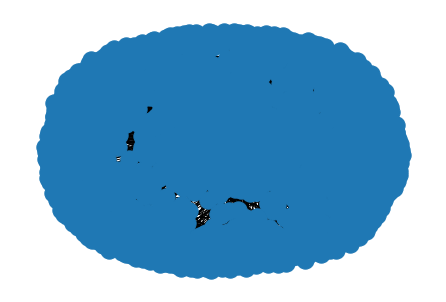

In [36]:
for i in range(len(citations_with_data)):
    D.add_weighted_edges_from([(str(citations_with_data.iloc[i]['FromNodeId']),str(citations_with_data.iloc[i]['ToNodeId']),1)])
    
# Plot graph
nx.draw(D, with_labels=False)
plt.show()

In [37]:
#FROM GRAPH TO ADJ MAT

AM_sparse =nx.adjacency_matrix(D) #list storage type

AM_matrix = AM.todense()
AM_matrix_df = pd.DataFrame(AM_matrix)
AM_matrix_df

,0,1,2,3,4,5,6,7,8,9,...,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1063,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


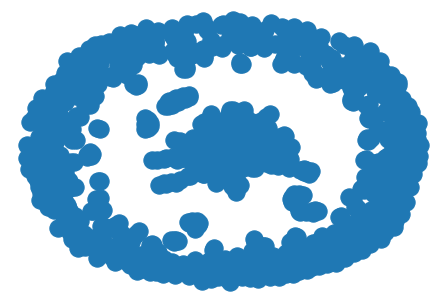

In [40]:
#FROM ADJ MAT TO GRAPH
D_2 = nx.from_numpy_matrix(AM_matrix, create_using = nx.MultiGraph())
nx.draw(D_2, with_labels=False)
plt.show()

In [16]:
import numpy as np
np.shape(AM_matrix) #ho 1066 nodi

(1066, 1066)

In [21]:
# Print page rank for each pages
PR = nx.pagerank(D)

PR_df = pd.DataFrame.from_dict(PR,orient='index')

PR_df

,0
9503222,0.000423
9310202,0.000782
9312207,0.000960
9312202,0.001238
9910201,0.000542
...,...
9911207,0.000542
9911254,0.000423
9911219,0.000782
9912235,0.000423


In [25]:
PR_df[0].sum() #ho la prob di ogni nodo

0.999999999999999

In [26]:
PR_df[0].max()

0.03494698609971289